## Customer Segmentation - Unsupervised Learning Project

<br>
<img src="customer-segmentation.png" height="100px" />

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unsupervised Learning 
from sklearn.cluster import KMeans

### Data Collection & Preprocessing

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# CustomerID is of no use for any preprocessing tasks

dataset.drop(['CustomerID'],axis='columns',inplace=True)

In [5]:
dataset.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
# Missing values

dataset.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Selecting features

X = dataset.drop(['Age','Gender'],axis='columns')

In [10]:
X[:5]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
# Transforming Dataframe - X to numpy array
X = X.values

In [12]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

### Exploratory Data Analysis

In [13]:
sns.set()

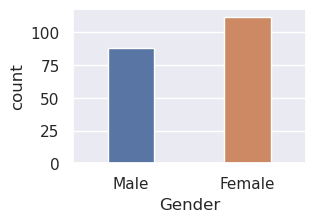

In [14]:
plt.figure(figsize=(3,2))
sns.countplot(data=dataset,x='Gender',width=0.4)
plt.show()

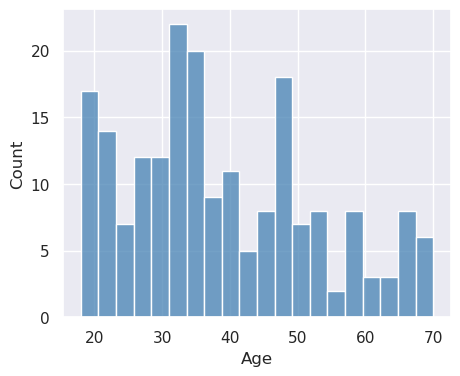

In [15]:
plt.figure(figsize=(5,4))
sns.histplot(data=dataset,x='Age',bins=20,color='steelblue')
plt.show()

#### Age ranging from 30-40, forms large set of customers

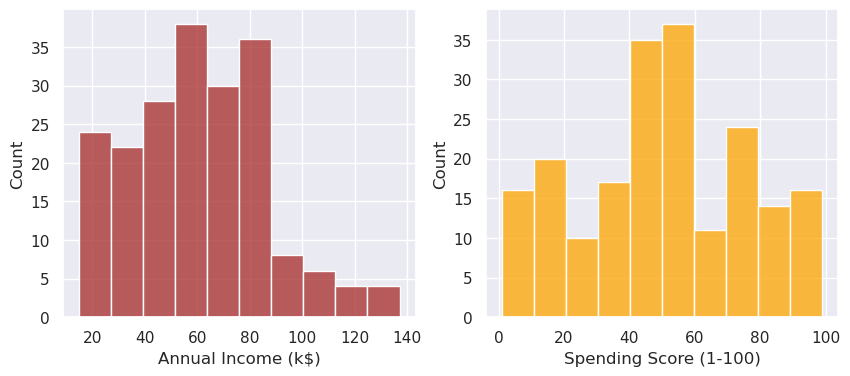

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(data=dataset,x='Annual Income (k$)',bins=10,color='brown')

plt.subplot(1,2,2)
sns.histplot(data=dataset,x='Spending Score (1-100)',bins=10,color='orange')

plt.show()

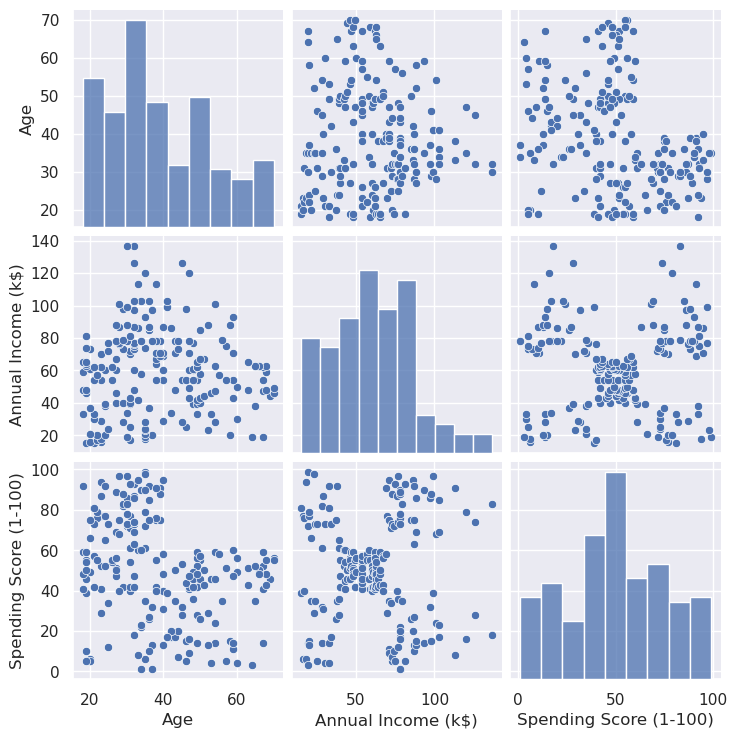

In [17]:
sns.pairplot(data=dataset)
plt.show()

### Selecting optimal Cluster No.

" Within  Cluster Sum of Squares ", (WCSS), is used to find optimal no. of clusters

In [18]:
optimal_wcss = []

# checking upto 15 clusters

for i in range(1,16):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    optimal_wcss.append(kmeans.inertia_)
    

In [19]:
# Plotting Elbow Point graph, that shows at which, total no. of clusters, WCSS is less.

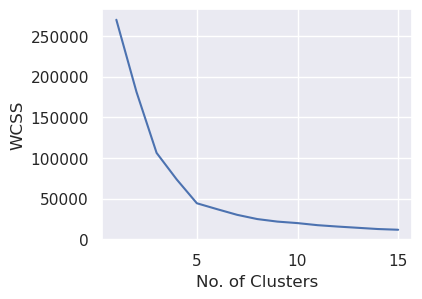

In [20]:
plt.figure(figsize=(4,3))
plt.plot(range(1,16),optimal_wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# Model Training

kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [22]:
y = kmeans.fit_predict(X)

In [23]:
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [24]:
centroids = kmeans.cluster_centers_

In [25]:
for k in range(0,len(centroids)):
    print(f"Centroid {k} :- {centroids[k]} ")

Centroid 0 :- [55.2962963  49.51851852] 
Centroid 1 :- [86.53846154 82.12820513] 
Centroid 2 :- [25.72727273 79.36363636] 
Centroid 3 :- [88.2        17.11428571] 
Centroid 4 :- [26.30434783 20.91304348] 


In [26]:
# Plotting all Clusters with Centroid

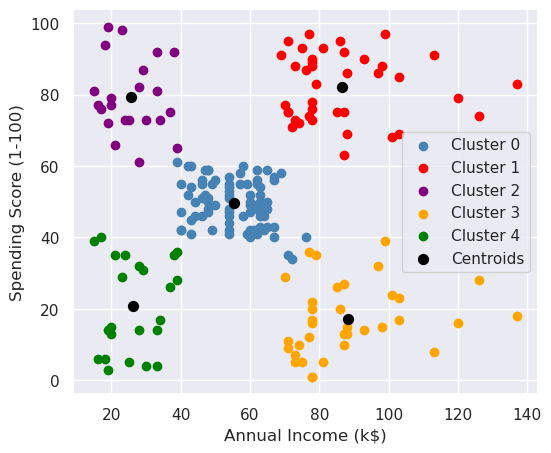

In [27]:
plt.figure(figsize=(6,5))

color_list = ['steelblue','red','purple','orange','green']

for i in range(0,5):
    lbl = "Cluster "+str(i)
    plt.scatter(X[y==i,0],X[y==i,1],c=color_list[i],label=lbl)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='black',label='Centroids')
    
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()